# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
Q^{*}_{r}( \omega _{old}) =\ \frac{1}{n}\sum ^{n}_{i=1}\left( y^{( pred)}_{i} -y^{( train)}_{i}\right)^{2} +\frac{1}{C}\sum ^{D}_{j=1} \omega ^{2}_{j}\\
\nabla _{\omega } Q^{*}_{r}( \omega _{old}) =\ \frac{1}{n} \nabla _{\omega }\left( \| X^{\{n\}} \omega -y^{\{n\}} \ \| ^{2}_{2}\right) +\frac{1}{C} \nabla _{\omega }\left( \omega ^{\top } I\omega \right) =\\
=\ \frac{1}{n} \nabla _{\omega }\left( \omega ^{\top }_{old} X^{\{n\} \top } X^{\{n\}} \omega _{old} \ -\ 2\omega ^{\top }_{old} X^{\{n\} \top } y^{\{n\}} +y^{\{n\} \top } y^{\{n\}} \ \right) +\ \frac{2}{C} \omega _{old} =\\
=\frac{2}{n}\left( X^{\{n\} \top } X^{\{n\}} \omega _{old} \ -\ X^{\{n\} \top } y^{\{n\}}\right) \ +\ \frac{2}{C} \omega _{old}\\
\end{array}$

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\omega _{new} \ =\ \omega _{old} -\alpha \nabla _{\omega } Q^{*}_{r}( \omega _{old}) =\\
=\ \omega _{old}\left( 1-\frac{2\alpha }{C}\right) -\frac{2\alpha }{n} X^{\{n\} \top }\left[ X^{\{n\}} \omega _{old} -y^{\{n\}}\right] \ =\ \\
=\omega _{old}\left( 1-\frac{2\alpha }{C}\right) \ +\frac{2\alpha }{n}\sum ^{n}_{j=1}[ y_{j} -x_{j} \omega _{old}] x_{j}
\end{array}$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
Используем\ замену\ :-\langle \omega ,x\rangle \ =\ t\\
d\left[ \ \log\left(\frac{1}{1+\exp( t)}\right)\right] \ =\ -\frac{e^{t} dt}{e^{t} +1} =-\frac{e^{-\langle \omega ,x\rangle } d( -\langle \omega ,x\rangle )}{1+e^{-\langle \omega ,x\rangle }} =\frac{e^{-\langle \omega ,x\rangle } \langle x,d\omega \rangle }{1+e^{-\langle \omega ,x\rangle }}\\
\Rightarrow \nabla _{\omega } \ =\ \frac{xe^{-\langle \omega ,x\rangle }}{1+e^{-\langle \omega ,x\rangle }}\\
\\
d\left[ \ \log\left( 1-\frac{1}{1+\exp( t)}\right)\right] \ =\ \frac{dt}{e^{t} +1} =\frac{-d( \langle \omega ,x\rangle )}{1+e^{-\langle \omega ,x\rangle }} =\frac{\langle -x,d\omega \rangle }{1+e^{-\langle \omega ,x\rangle }}\\
\Rightarrow \nabla _{\omega } \ =\ \frac{-x}{1+e^{-\langle \omega ,x\rangle }}\\
\\
\nabla _{\omega } Q^{*}_{r}( \omega _{old}) \ =\ -\frac{1}{n}\sum ^{n}_{i=1}\left[ y_{i} \nabla _{\omega }\log\left(\frac{1}{1+\exp( -\langle \omega ,x\rangle )}\right) \ +( 1-y_{i}) \nabla _{\omega }\log\left( 1-\frac{1}{1+\exp( -\langle \omega ,x\rangle )}\right)\right] +\frac{1}{C} \nabla _{\omega }\sum ^{D}_{j=1} \omega ^{2}_{j} \ =\\
\ \\
=-\frac{1}{n}\sum ^{n}_{i=1} \ \left[\frac{y_{i} x_{i} e^{-\langle \omega ,x\rangle }}{1+e^{-\langle \omega ,x\rangle }} -\frac{x_{i}( 1-y_{i})}{1+e^{-\langle \omega ,x\rangle }}\right] +\frac{2}{C} \omega _{old} \ =\ -\frac{1}{n}\sum ^{n}_{i=1} \ x_{i}\left[\frac{y_{i} e^{-\langle \omega ,x\rangle } -1+y_{i}}{1+e^{-\langle \omega ,x\rangle }}\right] +\frac{2}{C} \omega _{old} =-\ \frac{1}{n}\sum ^{n}_{i=1} \ x_{i}\left[\frac{y_{i}\left( 1+e^{-\langle \omega ,x\rangle }\right) -1}{1+e^{-\langle \omega ,x\rangle }}\right] +\frac{2}{C} \omega _{old} =\\
\\
=-\frac{1}{n}\sum ^{n}_{i=1} \ x_{i}[ y_{i} -\sigma ( \omega ,x_{i})] +\frac{2}{C} \omega _{old}\\
\\
\omega _{new} \ =\ \omega _{old} -\alpha \nabla _{\omega } Q^{*}_{r}( \omega _{old}) =\\
=\omega _{old}\left( 1-\frac{2\alpha }{C}\right) \ +\frac{\alpha }{n}\left[\sum ^{n}_{i=1} \ [ y_{i} -\sigma ( \omega ,x_{i})] x_{i}\right]\\
\\
\end{array}$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
Точное\ решение\ дает\ нам\ точку,\ в\ которой\ градиент\ равен\ 0\ ( по\ построению) .\ \\
Таким\ образом,\ лишь\ необходимо\ показать,\ что\ в\ этой\ точке\ выполнено\ достаточное\ условие\ минимума.\\
\\
Достаточным\ условием\ минимума\ для\ критической\ точки\ является\ положительная\ определенность\ диференциала\ \\
второго\ порядка\ заданной\ функции\ в\ этой\ точке.\\
\\
MSE=\ \frac{1}{N}\sum ^{N}_{i=1}( \langle x_{i} ,\omega \rangle -y_{i})^{2} \ =\frac{1}{N}\sum ^{N}_{i=1} \ \| X \omega -y \ \| ^{2}_{2} =\frac{1}{N}\left[ \omega ^{\top } X^{\top } X \omega -\ 2\omega ^{\top } X^{\top } y +y^{\top } y\right]\\
Как\ было\ показано\ ранее:\\
d( MSE) \ =\langle \ \frac{2}{N} X^{\top }( X \omega \ -y) ,\ d\omega \rangle \\
d^{2}( MSE) \ =\ d( d( MSE)) \ =\frac{2}{N} X^{\top } X\\
Таким\ образом\ Гессиан\ равен\ \ \frac{2}{N} X^{\top } X\\
Нетрудно\ видеть,что\ матрица\ X^{\top } X\ -\ это\ матрица\ Грамма,\ исходной\ системой\ векторов\ для\ которой\ являются\ столбцы\ матрицы\ X.\\
Как\ известно,\ матрица\ Грама\ любой\ линейно\ независимой\ системы\ векторов\ является\ положительно\ определенной.\ \\
Наша\ матрица\ X\ имеет\ полный\ ранг,\ значит\ ее\ столбцы\ гарантировано\ линейно\ независим\\
Таким\ образом,\ X^{\top } X\ -\ положительно\ определенная\ матрица.\\
Следовательно,\ Гессиан\ \frac{2}{N} X^{\top } X\ также\ положительно\ определен.\ Значит\ наша\ точка\ является\ точкой\ минимума.\\
\\
Приравняем\ градиен\ нулю:\\
\nabla _{\omega } Q^{*}_{r}( \omega _{old}) =\ \frac{2}{N} X^{\top }\left( X \omega \ -\ X^{\top } y\right) \ +\ \frac{2}{C} \omega =0\\
\frac{1}{N} X^{\top } X\omega \ -\ \frac{1}{N} X^{\top } y\ +\ \frac{1}{C} \omega =0\\
\\
\left(\frac{1}{N} X^{\top } X\ +\frac{I}{C} \ \right) \omega =\frac{1}{N} X^{\top } y\\
\\
\omega =\frac{1}{N} \ \left(\frac{1}{N} X^{\top } X\ +\frac{I}{C} \ \right)^{-1} X^{\top } y\\
Регуляризация\ добавит\ новые\ линейно\ незаваисимые\ значения\ на\ диагональ,\ что\ в\ свою\ очередь\ уничтожит\ \\
линейную\ зависимость\ столбцов,что\ в\ свою\ очередь\ даст\ нам\ положительно\ определенный\ Гессиан
\end{array}$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
Обозначим\ p_{i} \ =\ p( y_{i} =\ 1|\ x_{i})\\
Очевидно,\ что\ p( y_{i} =\ 0|\ x_{i}) \ =\ 1-p_{i}\\
\\
Перепишем\ матожидание\ в\ новых\ обозначениях:\\
E( L|x_{i}) \ =\ -p_{i}\log( a_{i}) \ -\ ( 1-p_{i})\log( 1-a_{i})\\
\\
\frac{\delta E}{\delta a} \ =\ -\frac{p_{i}}{a_{i}} +\frac{1-p_{i}}{1-a_{i}} \ =0\\
p_{i}( 1-a_{i}) =a_{i}( 1-p_{i})\\
p_{i} -a_{i} p_{i} =a_{i} -p_{i} a_{i}\\
a_{i} =p_{i}\\
\\
Осталось\ доказать,\ что\ найденная\ точка\ -\ минимум.\ Воспользуемся\ тем,\ что\ a\in ( 0,1) и\ p\in [ 0,1] :\\
\lim _{a\rightarrow 1^{-}}\left( -\frac{p_{i}}{a_{i}} +\frac{1-p_{i}}{1-a_{i}}\right) =\ +\infty \\
\lim _{a\rightarrow 0^{+}}\left( -\frac{p_{i}}{a_{i}} +\frac{1-p_{i}}{1-a_{i}}\right) =\ -\infty \\
Таким\ образом\ по\ знаку\ производной\ можно\ сделать\ вывод,\ что\ найденная\ точка\ -\ минимум\ на\ отрезке\ для\ всех\ p/\\
\\
\Rightarrow a_{i} =p_{i} =p( y_{i} =\ 1|\ x_{i}) \ минимизирует\ данное\ матожидание.
\end{array}$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Ответ:
Нет, не нужно. Этот член показывает смещение гиперплоскости и не умножается ни на какой из признаков, таким образом у нас нет стремления накладывать какие-либо ограничения на его величину.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    if shuffle:
        X_shuffled, y_shuffled = sk.utils.shuffle(X,y)        
        for i in range(0, len(y), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            yield (X_batch, y_batch)
    else:
        for i in range(0, len(y), batch_size):
            yield (X[i:i+batch_size], y[i:i+batch_size])

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [8]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1/(1+np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=10,threshold = 0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
        self.batch_size = batch_size
        self.threshold = threshold
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        N = len(y_batch)
        if self.model_type == 'lin_reg':
            loss= (1/N) * np.sum((y_batch - np.dot(X_batch, self.weights))**2) + (1/self.C) * np.sum(self.weights **2)
        
        if self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_batch, self.weights))
            loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)
        
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        N = len(y_batch)
        if self.model_type == 'lin_reg':
            loss_grad = (2/N) * np.dot(np.transpose(X_batch), np.dot(X_batch, self.weights) - y_batch) + (2/self.C)*self.weights
        
        if self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = (-1/N) * np.dot(y_batch-a, X_batch) + (2/self.C)*self.weights
        
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights- self.alpha*new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        #print('fit start')
        X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) #добавляем признак-единицу для смещения
        # Нужно инициализровать случайно веса
        self.weights = np.random.normal(0, 1, X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        #print('fit finish')        
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) #добавляем признак-единицу для смещения
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights) 
        
        if self.model_type == 'log_reg':
            a = sigmoid(np.dot(X, self.weights))
            y_hat = (a>self.threshold).astype(int)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        #if (np.any(np.isnan(y_hat))):
            #print('NAN')
        #if not np.all(np.isfinite(y_hat)):
            #print('inf')
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def plot_decision_boundary(clf):
    x = np.linspace(-4,8, 50)
    if clf.model_type == 'lin_reg':
        clr = 'r'
    if clf.model_type == 'log_reg':
        clr = 'b'
    plt.plot(x, (-x*clf.weights[1] - clf.weights[0])/clf.weights[2], c = clr)   
    plt.ylim(-5, 5)
    plt.xlim(-4,4)
    pass

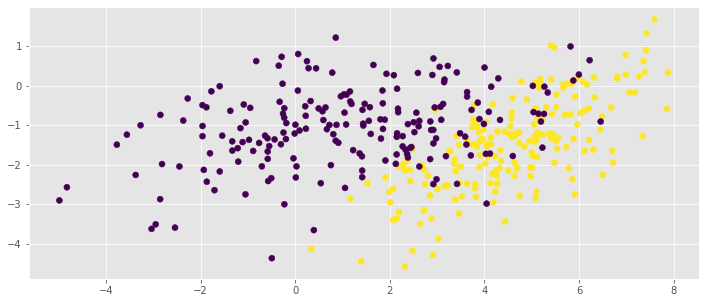

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)

plt.scatter(X[:,0], X[:,1], c=y)
#print(X[:,0], X[:,1])
#print(y)

In [11]:
#Сначала применим Z-нормализацию к данным
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)  
X = (X - mean) / std

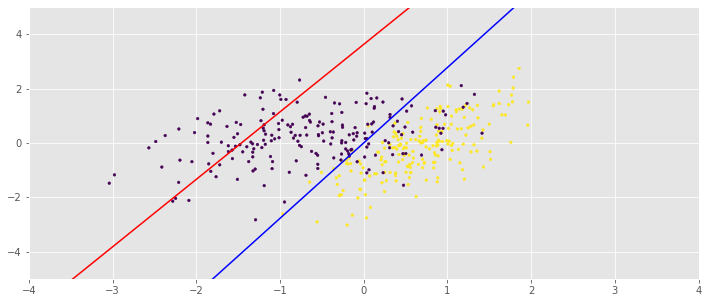

In [12]:
clf_lin = MySGDClassifier(batch_generator = batch_generator , C=1, alpha=0.01, max_epoch=10, model_type='lin_reg')
clf_log = MySGDClassifier(batch_generator= batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='log_reg')
clf_lin.fit(X, y)
clf_log.fit(X, y)
plot_decision_boundary(clf_lin)
plot_decision_boundary(clf_log)
plt.scatter(X[:,0], X[:,1], c=y, s=7)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [13]:
from sklearn.datasets import make_classification

In [14]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [15]:
N = 50
def graf(model):
    for alpha in [0.1, 0.05, 0.01, 0.005, 0.001]:
        clf = MySGDClassifier(batch_generator, max_epoch=8, model_type=model, batch_size=10, alpha=alpha)
        clf.fit(X,y)
        loss = np.asarray(clf.errors_log['loss'])
        plt.plot([loss[i:i+N].mean() for i in range(loss.shape[0] // N +1)], label = 'alpha={}'.format(alpha))
    plt.legend()
        

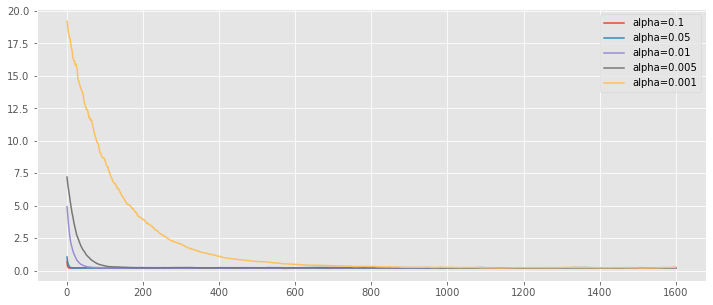

In [16]:
graf('lin_reg')

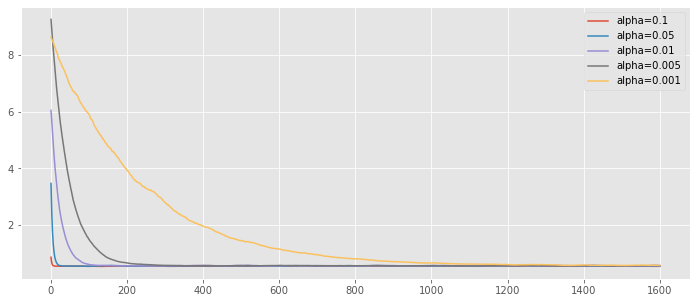

In [17]:
graf("log_reg")

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

C:\python\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-8-30422217b056>:45: RuntimeWarning: overflow encountered in double_scalars
  loss= (1/N) * np.sum((y_batch - np.dot(X_batch, self.weights))**2) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:45: RuntimeWarning: overflow encountered in square
  loss= (1/N) * np.sum((y_batch - np.dot(X_batch, self.weights))**2) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:62: RuntimeWarning: overflow encountered in multiply
  loss_grad = (2/N) * np.dot(np.transpose(X_batch), np.dot(X_batch, self.weights) - y_batch) + (2/self.C)*self.weights
<ipython-input-8-30422217b056>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:49:

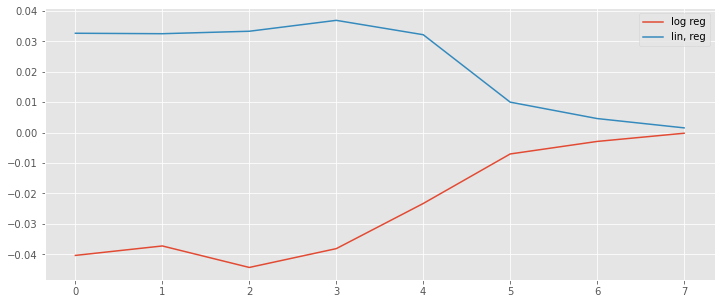

In [18]:
lin = []
log = []
x_axis = []
for C in np.logspace(3,-3,10):
    clf_lin = MySGDClassifier(batch_generator, C = C,  alpha= 0.01, max_epoch=1, model_type='lin_reg')
    clf_log = MySGDClassifier(batch_generator, C = C,  alpha= 0.01, max_epoch=1, model_type='log_reg')
    clf_lin.fit(X, y)
    clf_log.fit(X, y) 
    x_axis.append(C)
    lin.append(clf_lin.weights.mean())
    log.append(clf_log.weights.mean())

#print(x_axis)
#print(log)
#print(lin)
#plt.plot(x_axis, log, label = 'log reg')
#plt.plot(x_axis, lin, label = 'lin, reg')
plt.plot(range(len(x_axis)), log, label = 'log reg')
plt.plot(range(len(x_axis)), lin, label = 'lin, reg')
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [19]:
doc_to_title = {}
with open('docs_titles.tsv',  encoding='utf-8', newline='') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [20]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [21]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [22]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [26]:
from sklearn.model_selection import cross_val_score

best_score = 0

best_c = 2.154
best_alpha = 0.0301 
best_max_epoch = 15
best_model_type = 'log_reg'
best_threshold = 0.44999999999999973
best_batch_size = 15

In [27]:
for batch_size in range(5, 50, 5):
    clf = MySGDClassifier(batch_generator,  C = best_c, alpha=best_alpha, max_epoch =best_max_epoch, model_type='log_reg', threshold = best_threshold,  batch_size = batch_size)  
    score = np.mean(cross_val_score(clf, X_train, y_train, scoring = 'f1'))
    if score > best_score:
        best_score = score
        best_batch_size = batch_size

<ipython-input-8-30422217b056>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [31]:
for C in np.arange(1.0, 10.0, 0.1):
    clf = MySGDClassifier(batch_generator,  C = C, alpha=best_alpha, max_epoch =best_max_epoch, model_type='log_reg', threshold = best_threshold,  batch_size = best_batch_size)  
    score = np.mean(cross_val_score(clf, X_train, y_train, scoring = 'f1'))
    if score > best_score:
        best_score = score
        best_c = C

<ipython-input-8-30422217b056>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)


In [33]:
for alpha in [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001 ]:
    for max_epoch in range(1, 30, 5):
        clf = MySGDClassifier(batch_generator,  C = best_c, alpha=alpha, max_epoch = max_epoch, model_type='log_reg', threshold = best_threshold,  batch_size = best_batch_size) 
        score = np.mean(cross_val_score(clf, X_train, y_train, scoring = 'f1'))
        if score > best_score:
            best_score = score
            best_alpha = alpha
            best_max_epoch = max_epoch

<ipython-input-8-30422217b056>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [34]:
for threshold in np.arange(-0.5, 0.5, 0.05): 
    clf = MySGDClassifier(batch_generator,  C = best_c, alpha=best_alpha, max_epoch =best_max_epoch, model_type='log_reg', threshold = threshold,  batch_size = best_batch_size) 
    score = np.mean(cross_val_score(clf, X_train, y_train, scoring = 'f1'))
    if score > best_score:
        best_score = score
        best_threshold = threshold

<ipython-input-8-30422217b056>:49: RuntimeWarning: divide by zero encountered in log
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)
<ipython-input-8-30422217b056>:49: RuntimeWarning: invalid value encountered in multiply
  loss = (-1/N) * np.sum(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)) + (1/self.C) * np.sum(self.weights **2)


best_c= 4.600000000000003 best_alpha= 0.0301 best_max_epoch= 15 best_threshold= 0.44999999999999973 best_batch_size= 15
0.2886889009633635


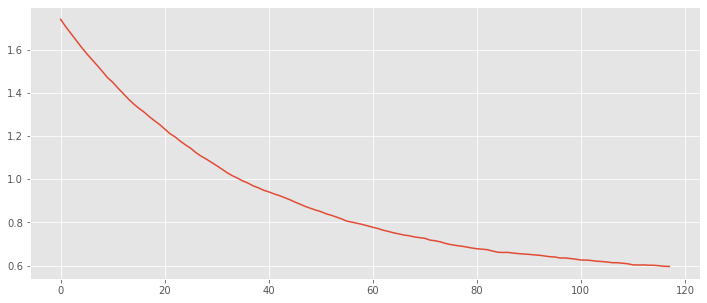

In [35]:
print('best_c=',best_c,'best_alpha=',best_alpha, 'best_max_epoch=', best_max_epoch, 'best_threshold=', best_threshold, 'best_batch_size=', best_batch_size)

best_clf = MySGDClassifier(batch_generator,  C = best_c, alpha=best_alpha, max_epoch =best_max_epoch, model_type='log_reg', batch_size = best_batch_size, threshold = best_threshold)
best_clf.fit(X_train, y_train)

N=100
loss = np.asarray(best_clf.errors_log['loss'])
print(np.min(loss))
plt.plot([loss[i:i+N].mean() for i in range(loss.shape[0] // N +1)])

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [ ]:
[TeamUnknown]

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***